<a href="https://colab.research.google.com/github/sfomel/Abstracters/blob/main/Abstracters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
xls = '/content/drive/MyDrive/EAGE2023_CompanyNames.xlsx'

import pandas as pd

# Load the spreadsheet into a data frame
df = pd.read_excel(xls) # , sheet_name=1)
df = df.dropna()
df.head()

,Event Name,Event Alias,Start Date,End Date,Location,Session Name,Paper Reference,Title,Authors,SAB Co Name,SAB Org Call,Affiliations,ISSN,ISBN,DOI,Access,Language,Summary,File name
2,84th EAGE Annual Conference & Exhibition,eageannual2023,2023-06-05,2023-06-08,"Vienna, Austria",Global Oil and Gas Exploration Case Studies,9,The Norwegian Barents Sea: Experience On Drill...,"M. Mosesyan, N.O. Berg Njå [1]",AkerBP,IOC,[1] AkerBP ASA,2214-4609,9789462824584,10.3997/2214-4609.202310009,No,English,Drilling through carbonates and open karsts is...,9.pdf
26,84th EAGE Annual Conference & Exhibition,eageannual2023,2023-06-05,2023-06-08,"Vienna, Austria",Posters: Geology 2,75,Sequential Diagenesis: constraining paragenesi...,"A. Consonni [1], M. Idiomi [1], A. Ortenzi [1]",ENI,IOC,[1] Eni S.p.A.,2214-4609,9789462824584,10.3997/2214-4609.202310075,No,English,Paragenesis of a reservoir rock is the sequenc...,75.pdf
38,84th EAGE Annual Conference & Exhibition,eageannual2023,2023-06-05,2023-06-08,"Vienna, Austria",Petrophysics & Core Data - 2,97,Predictions of Relative Permeability and Fract...,"G. Burmester [1], A. Jones [1], H. Jurcic [1],...",OMV,IOC,[1] OMV Exploration & Production GmbH; [2] Mon...,2214-4609,9789462824584,10.3997/2214-4609.202310097,No,English,"In OMV’s digitalization program, OMV reviewed ...",97.pdf
61,84th EAGE Annual Conference & Exhibition,eageannual2023,2023-06-05,2023-06-08,"Vienna, Austria",Best of Petroleum Geoscience (Dedicated Session),137,The rejuvenation of hydrocarbon exploration in...,"F. Lottaroli [1], L. Meciani [1]",ENI,IOC,[1] Eni S.p.A. E&P,2214-4609,9789462824584,10.3997/2214-4609.202310137,No,English,The Eastern Mediterranean Province (Nile Delta...,137.pdf
92,84th EAGE Annual Conference & Exhibition,eageannual2023,2023-06-05,2023-06-08,"Vienna, Austria",Integrated Approaches to Production Challenges,182,Early warning ultra-light marine seismic 4D ti...,"P.E. Dhelie [1], K.R. Straith [1], V. Danielse...",AkerBP,IOC,[1] AkerBP; [2] SpotLight,2214-4609,9789462824584,10.3997/2214-4609.202310182,No,English,The Edvard Grieg field is an offshore oil fiel...,182.pdf


In [ ]:
company = df['SAB Co Name']

In [ ]:
companies = company.unique()
print(companies)

['AkerBP' 'ENI' 'OMV' 'Equinor' 'Wintershall' 'Shell' 'CVX' 'XOM' 'BP'
 'TOT' 'Repsol' 'Cairn']


In [ ]:
# initialize keyword dictionary
keytext = {}
for company in companies:
  keytext[company] = ''

In [ ]:
import os

# loop through the table
for index, row in df.iterrows():
    company = row['SAB Co Name']
    pdf = row['File name']
    # keywords are stored in text files
    txt = os.path.join('/content/drive/MyDrive/EAGE2',
                       os.path.splitext(pdf)[0]+'_key.txt')
    if os.path.isfile(txt):
      with open(txt, "r") as file:
        keywords = file.read()
        # accumulate in the dictionary
        keytext[company] += ', ' + keywords

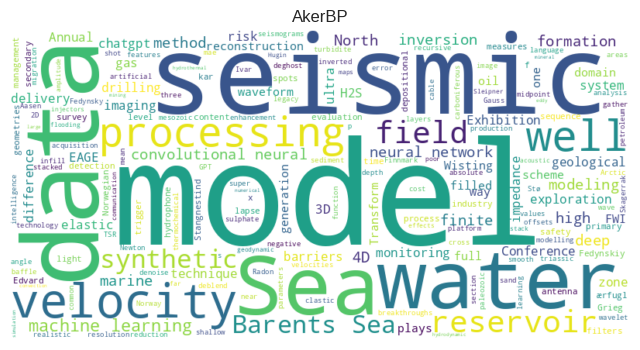

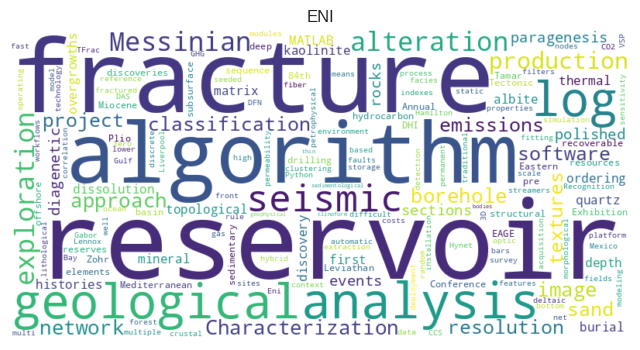

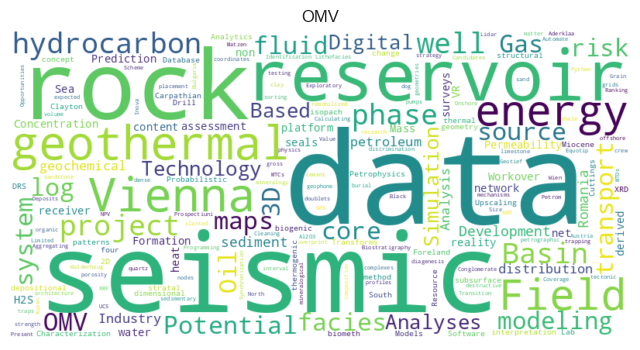

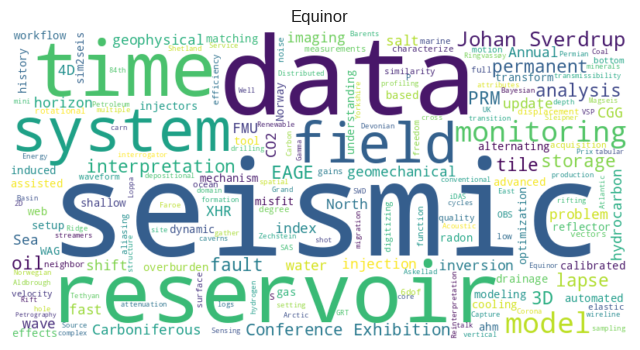

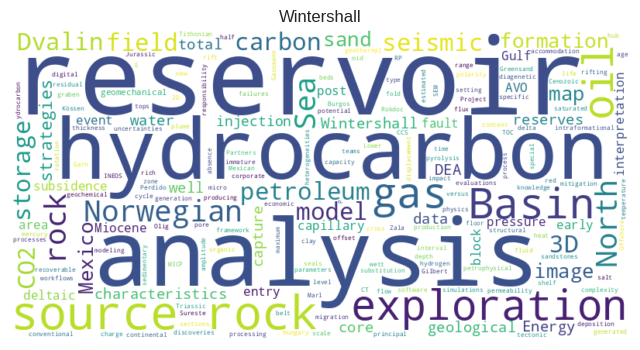

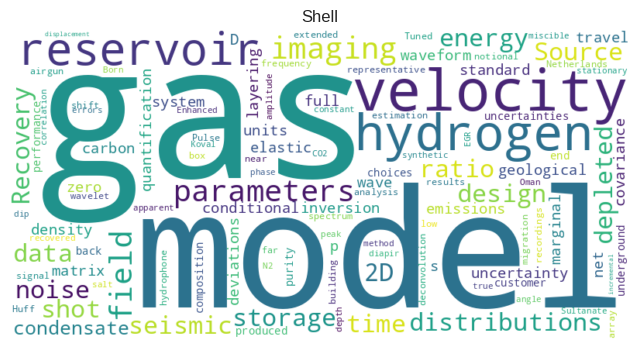

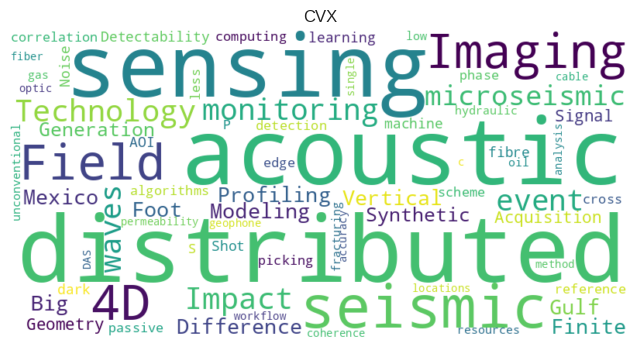

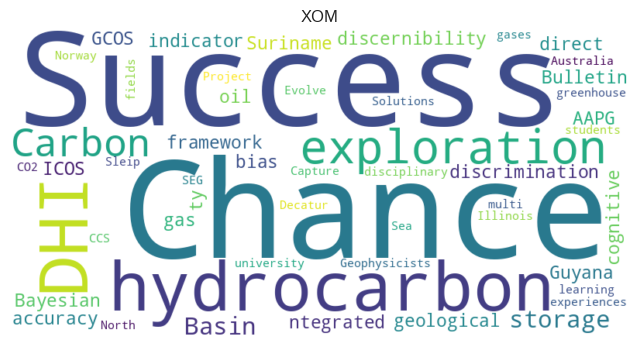

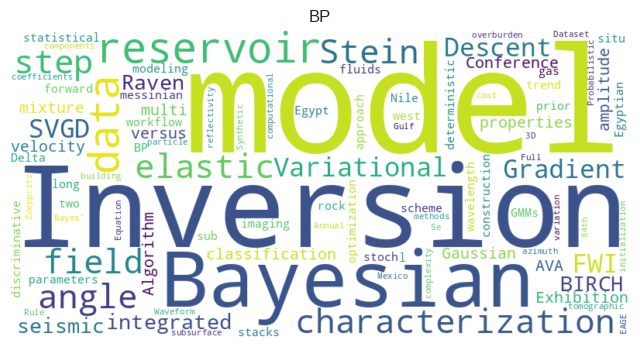

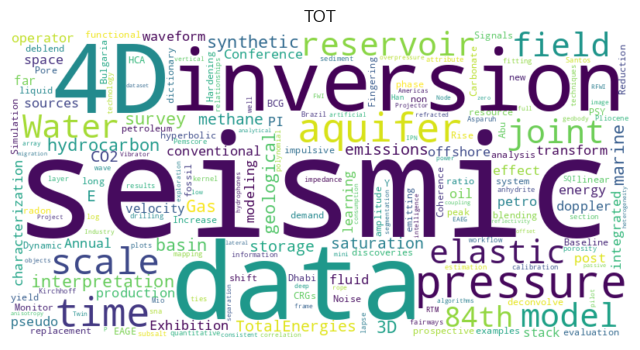

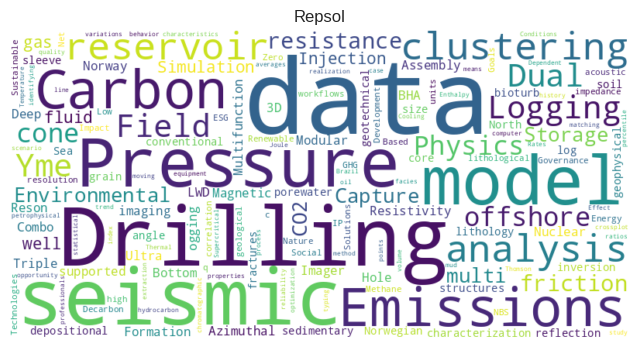

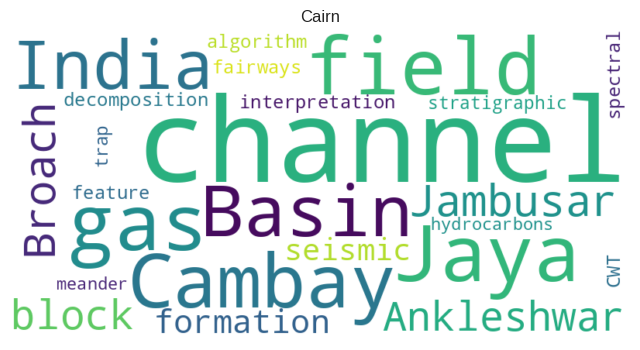

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for company in companies:
  keywords = keytext[company]
  if keywords:
    # Create the world cloud object
    wordcloud = WordCloud(width=800, height=400, 
                        background_color="white").generate(keywords)

    # Generate the word cloud image
    wordcloud_image = wordcloud.to_image()
    plt.imshow(wordcloud_image, interpolation='bilinear')
    plt.title(company)
    plt.axis('off')
    plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

objects = []
for company in companies:
  # extract keywords
  keywords = keytext[company].replace(',','')
  objects.append(keywords)

# vectorize using TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(objects)


In [ ]:
from sklearn.cluster import KMeans

# Apply K-means clustering
num_clusters = 3  # Number of desired clusters
kmeans = KMeans(n_clusters=num_clusters, n_init='auto')
kmeans.fit(tfidf_matrix)

KMeans(n_clusters=3, n_init='auto')

In [ ]:
for i, company in enumerate(companies):
    print(f"{company}: Cluster {kmeans.labels_[i]}")

AkerBP: Cluster 1
ENI: Cluster 2
OMV: Cluster 2
Equinor: Cluster 1
Wintershall: Cluster 2
Shell: Cluster 1
CVX: Cluster 1
XOM: Cluster 2
BP: Cluster 1
TOT: Cluster 1
Repsol: Cluster 0
Cairn: Cluster 2


In [ ]:
tfidf_matrix.shape, companies.shape

((12, 1224), (12,))

/usr/local/lib/python3.10/dist-packages/yellowbrick/text/tsne.py:401: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  self.ax.scatter(


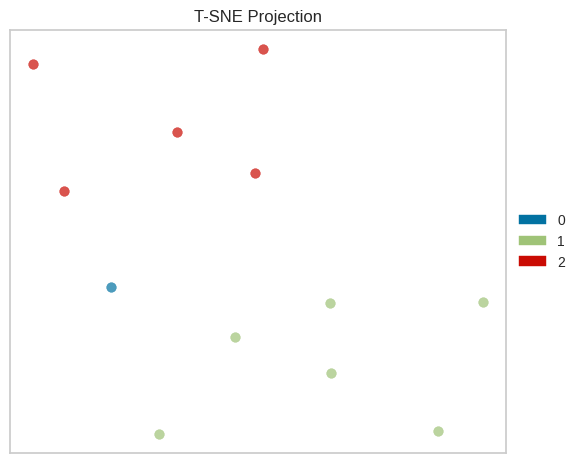

<Axes: title={'center': 'T-SNE Projection'}>

In [ ]:
from yellowbrick.text import TSNEVisualizer

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer(perplexity=5, title='T-SNE Projection',
                      random_state=42)
tsne.fit(tfidf_matrix, kmeans.labels_)
tsne.show()

/usr/local/lib/python3.10/dist-packages/yellowbrick/text/tsne.py:401: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  self.ax.scatter(


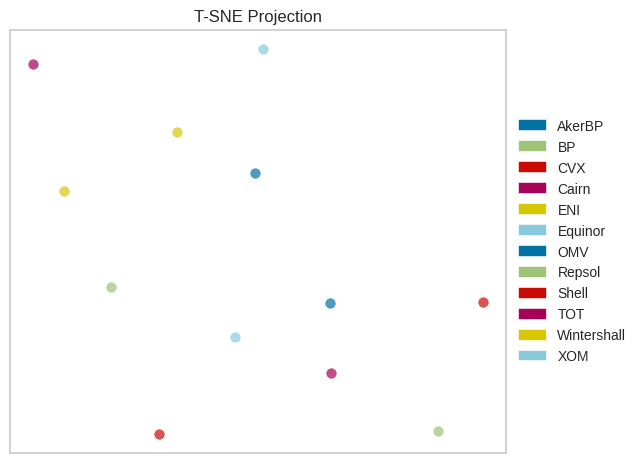

<Axes: title={'center': 'T-SNE Projection'}>

In [ ]:
tsne = TSNEVisualizer(perplexity=5, title='T-SNE Projection',
                      random_state=42)
tsne.fit(tfidf_matrix, companies)
tsne.show()

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

objects = []
for company in companies:
  # extract keywords
  keywords = keytext[company].split(',')
  objects.append(keywords)

# alternative vectorization
mlb = MultiLabelBinarizer()
mlb_matrix = mlb.fit_transform(objects)

In [ ]:
mlb_matrix.shape

(12, 966)

In [ ]:
# Apply K-means clustering
num_clusters = 5  # Number of desired clusters
kmeans = KMeans(n_clusters=num_clusters, n_init='auto')
kmeans.fit(mlb_matrix)

KMeans(n_clusters=5, n_init='auto')

In [ ]:
for i, company in enumerate(companies):
    print(f"{company}: Cluster {kmeans.labels_[i]}")

AkerBP: Cluster 1
ENI: Cluster 3
OMV: Cluster 3
Equinor: Cluster 2
Wintershall: Cluster 3
Shell: Cluster 0
CVX: Cluster 3
XOM: Cluster 3
BP: Cluster 3
TOT: Cluster 4
Repsol: Cluster 3
Cairn: Cluster 3
